# Company bankruptcy prediction

### What should be done in the project?
In summary, in this second project you will:
1. [DONE] Select a non-trivial dataset for a classification task (more than 20
columns, more than 1000 examples and, preferable, with missing, noisy or
heterogeneous data).
2. [IN-PROCESS] Do the necessary pre-processing for you data. Also, describe and justify
it in the documentation.
    - Classify variables
3. [TO BE DONE] Apply the methods explained in theory lectures to your dataset. If the
algorithm requires it, find the best parameters for the algorithm. Tuning
of parameters has to be done in a meaningful way. An explanation of the
procedure followed and parameters tested should appear in the documen-
tation.
    - Methods are Nearest Neighbors and Naive Bayes.
4. [TO BE DONE] Try to interpret the models returned by the algorithms, specially in the
case of decision trees.
5. [TO BE DONE] Evaluate and compare different methods applied.
6. [TO BE DONE] Discuss why you think that one method works better than another in your
dataset.
Of course, for the second project you can apply, if necessary, any technique
learned in the first part of the course.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.precision", 3)

sns.set_style("dark")

### Rename of column names

In [57]:
df = pd.read_csv("american_bankruptcy.csv")

dict = {
    "company_name": "Company name",
    "status_label": "Status",
    "year": "Year",
    "X1": "Current assets",
    "X2": "Cost goods sold",
    "X3": "DEP and AMO",
    "X4": "EBITDA",
    "X5": "Inventory",
    "X6": "Net income",
    "X7": "Total Receivables",
    "X8": "Market value",
    "X9": "Net sales",
    "X10": "Total assets",
    "X11": "Long-term debt",
    "X12": "EBIT",
    "X13": "Gross Profit",
    "X14": "Current Liabilities ",
    "X15": "Retained Earnings",
    "X16": "Total Revenue",
    "X17": "Total Liabilities",
    "X18": "Operating Expenses",
}


df = df.rename(columns=dict).sample(1000)
df.head()

,Company name,Status,Year,Current assets,Cost goods sold,DEP and AMO,EBITDA,Inventory,Net income,Total Receivables,Market value,Net sales,Total assets,Long-term debt,EBIT,Gross Profit,Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Operating Expenses
41746,C_4324,failed,2002,36.373,57.128,3.460,-7.734,8.297,-11.219,13.913,29.013,82.386,44.556,0.286,-11.194,25.258,34.302,-125.990,82.386,35.582,90.120
36796,C_3708,alive,2003,161.813,121.768,5.145,23.337,43.958,11.817,32.507,305.308,203.542,271.713,0.000,18.192,81.774,54.809,125.980,203.542,59.604,180.205
14957,C_1234,alive,2016,2837.756,4448.627,67.259,269.179,831.826,95.822,1743.300,1377.908,4973.076,4038.620,673.629,201.920,524.449,1518.943,428.212,4973.076,2485.597,4703.897
41998,C_4353,alive,2002,16.048,113.917,11.605,13.875,0.521,0.474,11.054,9.404,127.792,81.582,19.136,2.270,13.875,24.599,18.474,127.792,55.857,113.917
43519,C_4538,alive,1999,14.484,42.797,1.945,1.443,8.434,-0.848,0.362,14.159,66.570,22.241,0.480,-0.502,23.773,6.635,2.984,66.570,7.893,65.127


In [58]:
df.describe()

,Year,Current assets,Cost goods sold,DEP and AMO,EBITDA,Inventory,Net income,Total Receivables,Market value,Net sales,Total assets,Long-term debt,EBIT,Gross Profit,Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Operating Expenses
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,2007.489,695.083,1130.748,130.725,333.716,161.628,98.494,217.504,3152.258,1806.062,2605.364,651.038,202.991,675.314,453.275,523.772,1806.062,1506.552,1472.346
std,5.811,3484.171,5508.348,960.773,2077.202,639.138,729.292,930.365,15559.599,8220.231,15042.310,3676.138,1378.960,3732.830,2084.785,6083.872,8220.231,8452.382,6689.007
min,1999.000,0.001,0.000,0.000,-1292.315,0.000,-4154.000,0.000,0.006,0.002,0.001,0.000,-6133.000,-604.140,0.039,-17088.000,0.002,0.039,0.069
25%,2002.000,16.477,15.505,1.102,-0.982,0.000,-7.521,2.676,33.139,23.322,34.162,0.000,-3.174,7.505,7.859,-67.074,23.322,12.451,28.797
50%,2007.000,91.754,91.177,6.595,13.817,5.166,1.574,19.906,199.147,169.019,182.853,3.805,5.223,57.755,38.127,-0.528,169.019,66.179,156.927
75%,2012.000,360.335,475.776,39.034,125.616,59.960,39.014,107.069,1213.032,815.451,971.799,157.835,78.526,303.154,184.046,154.776,815.451,491.153,664.486
max,2018.000,70994.000,98932.000,19457.000,48574.000,9565.000,11809.000,14092.000,253635.500,131537.000,274098.000,89658.000,31968.000,75663.000,31785.000,169203.000,131537.000,178682.000,122861.000


### Check for missing values

In [59]:
df.isna().sum()

Company name            0
Status                  0
Year                    0
Current assets          0
Cost goods sold         0
DEP and AMO             0
EBITDA                  0
Inventory               0
Net income              0
Total Receivables       0
Market value            0
Net sales               0
Total assets            0
Long-term debt          0
EBIT                    0
Gross Profit            0
Current Liabilities     0
Retained Earnings       0
Total Revenue           0
Total Liabilities       0
Operating Expenses      0
dtype: int64

In [60]:
df.min()

Company name              C_1004
Status                     alive
Year                        1999
Current assets             0.001
Cost goods sold              0.0
DEP and AMO                  0.0
EBITDA                 -1292.315
Inventory                    0.0
Net income               -4154.0
Total Receivables            0.0
Market value               0.006
Net sales                  0.002
Total assets               0.001
Long-term debt               0.0
EBIT                     -6133.0
Gross Profit             -604.14
Current Liabilities        0.039
Retained Earnings       -17088.0
Total Revenue              0.002
Total Liabilities          0.039
Operating Expenses         0.069
dtype: object

### Univariate analysis

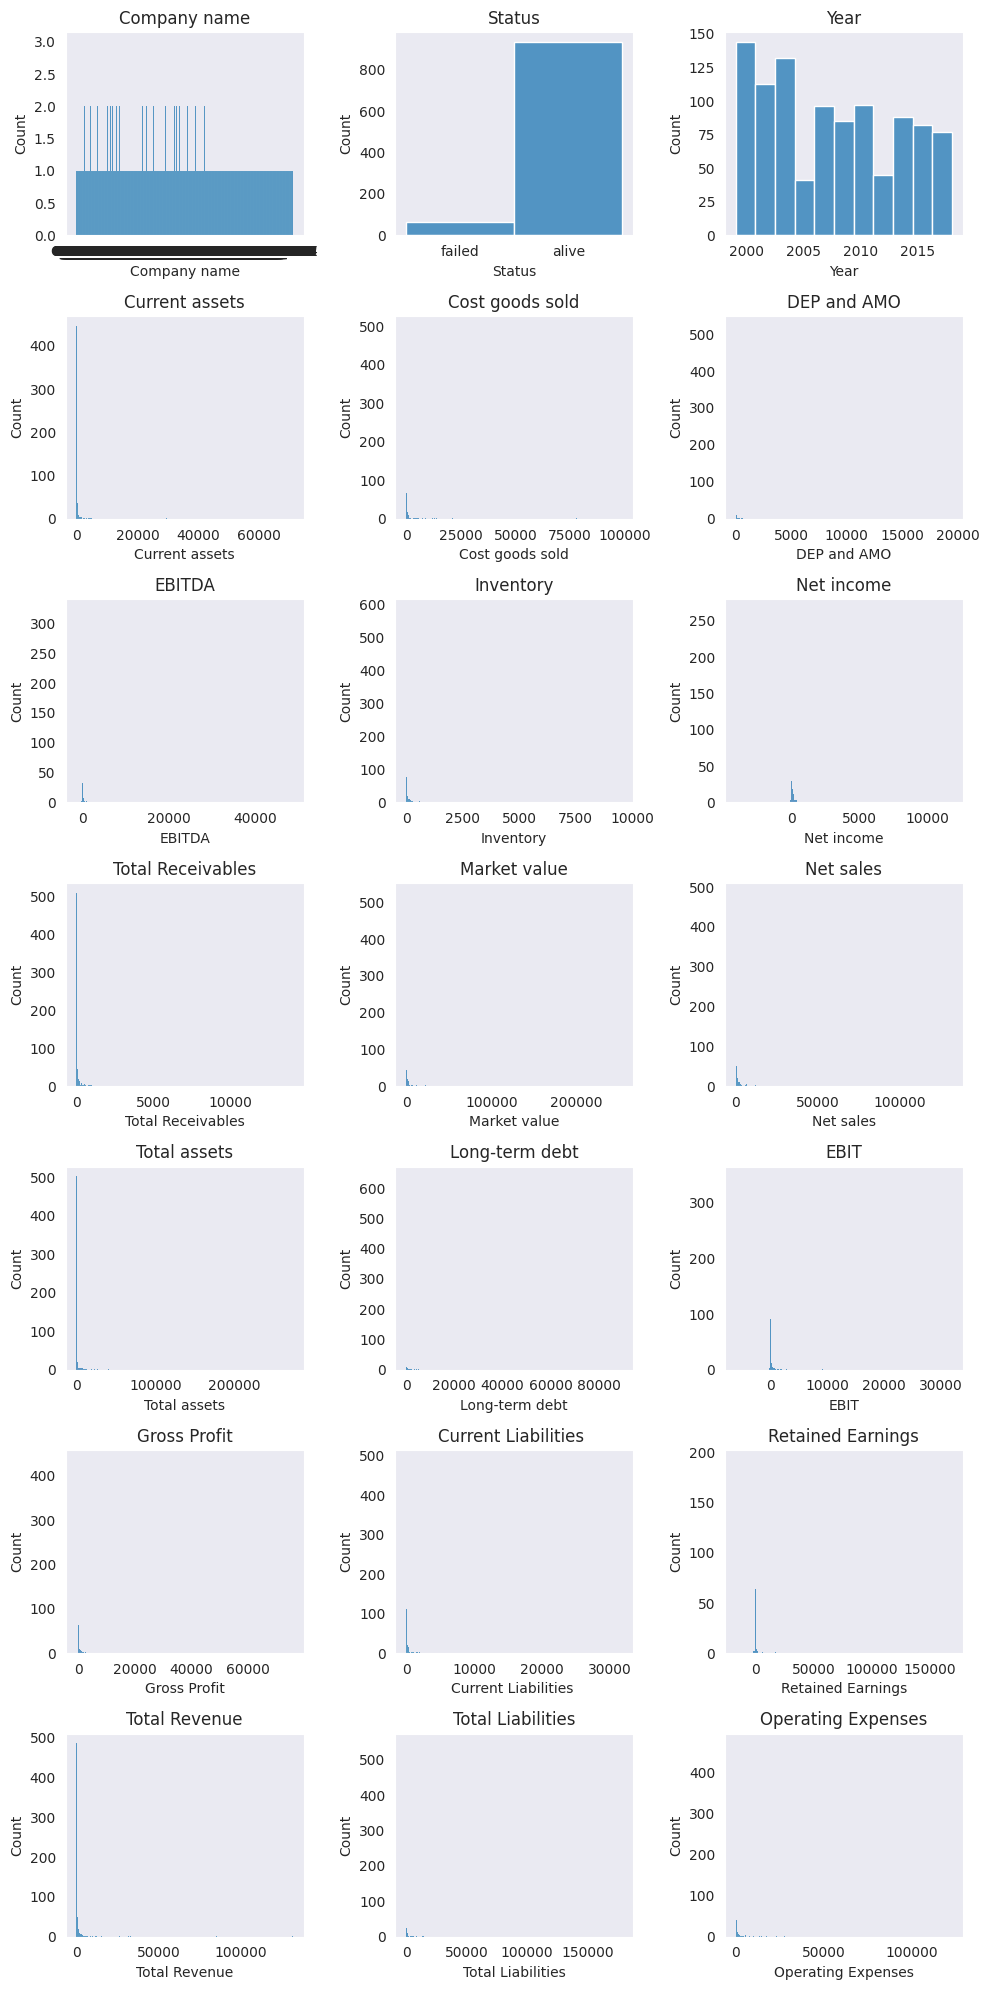

In [61]:
fig, axes = plt.subplots(7,3,figsize=(10,20))

for i, c in enumerate(df.columns):
    ax = axes.reshape(-1)[i]
    if df[c].dtype.kind == "object":
        a = sns.countplot(x=c,data=df,ax=ax)
    else:
        b = sns.histplot(x=c,data=df,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

### Bivariate analysis

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Current assets', ylabel='Year'>,
        <Axes: xlabel='Cost goods sold', ylabel='Year'>,
        <Axes: xlabel='DEP and AMO', ylabel='Year'>,
        <Axes: xlabel='EBITDA', ylabel='Year'>,
        <Axes: xlabel='Inventory', ylabel='Year'>,
        <Axes: xlabel='Net income', ylabel='Year'>,
        <Axes: xlabel='Total Receivables', ylabel='Year'>,
        <Axes: xlabel='Market value', ylabel='Year'>,
        <Axes: xlabel='Net sales', ylabel='Year'>,
        <Axes: xlabel='Total assets', ylabel='Year'>,
        <Axes: xlabel='Long-term debt', ylabel='Year'>,
        <Axes: xlabel='EBIT', ylabel='Year'>,
        <Axes: xlabel='Gross Profit', ylabel='Year'>,
        <Axes: xlabel='Current Liabilities ', ylabel='Year'>,
        <Axes: xlabel='Retained Earnings', ylabel='Year'>,
        <Axes: xlabel='Total Revenue', ylabel='Year'>,
        <Axes: xlabel='Total Liabilities', ylabel='Year'>,
        <Axes: xlabel='Opera

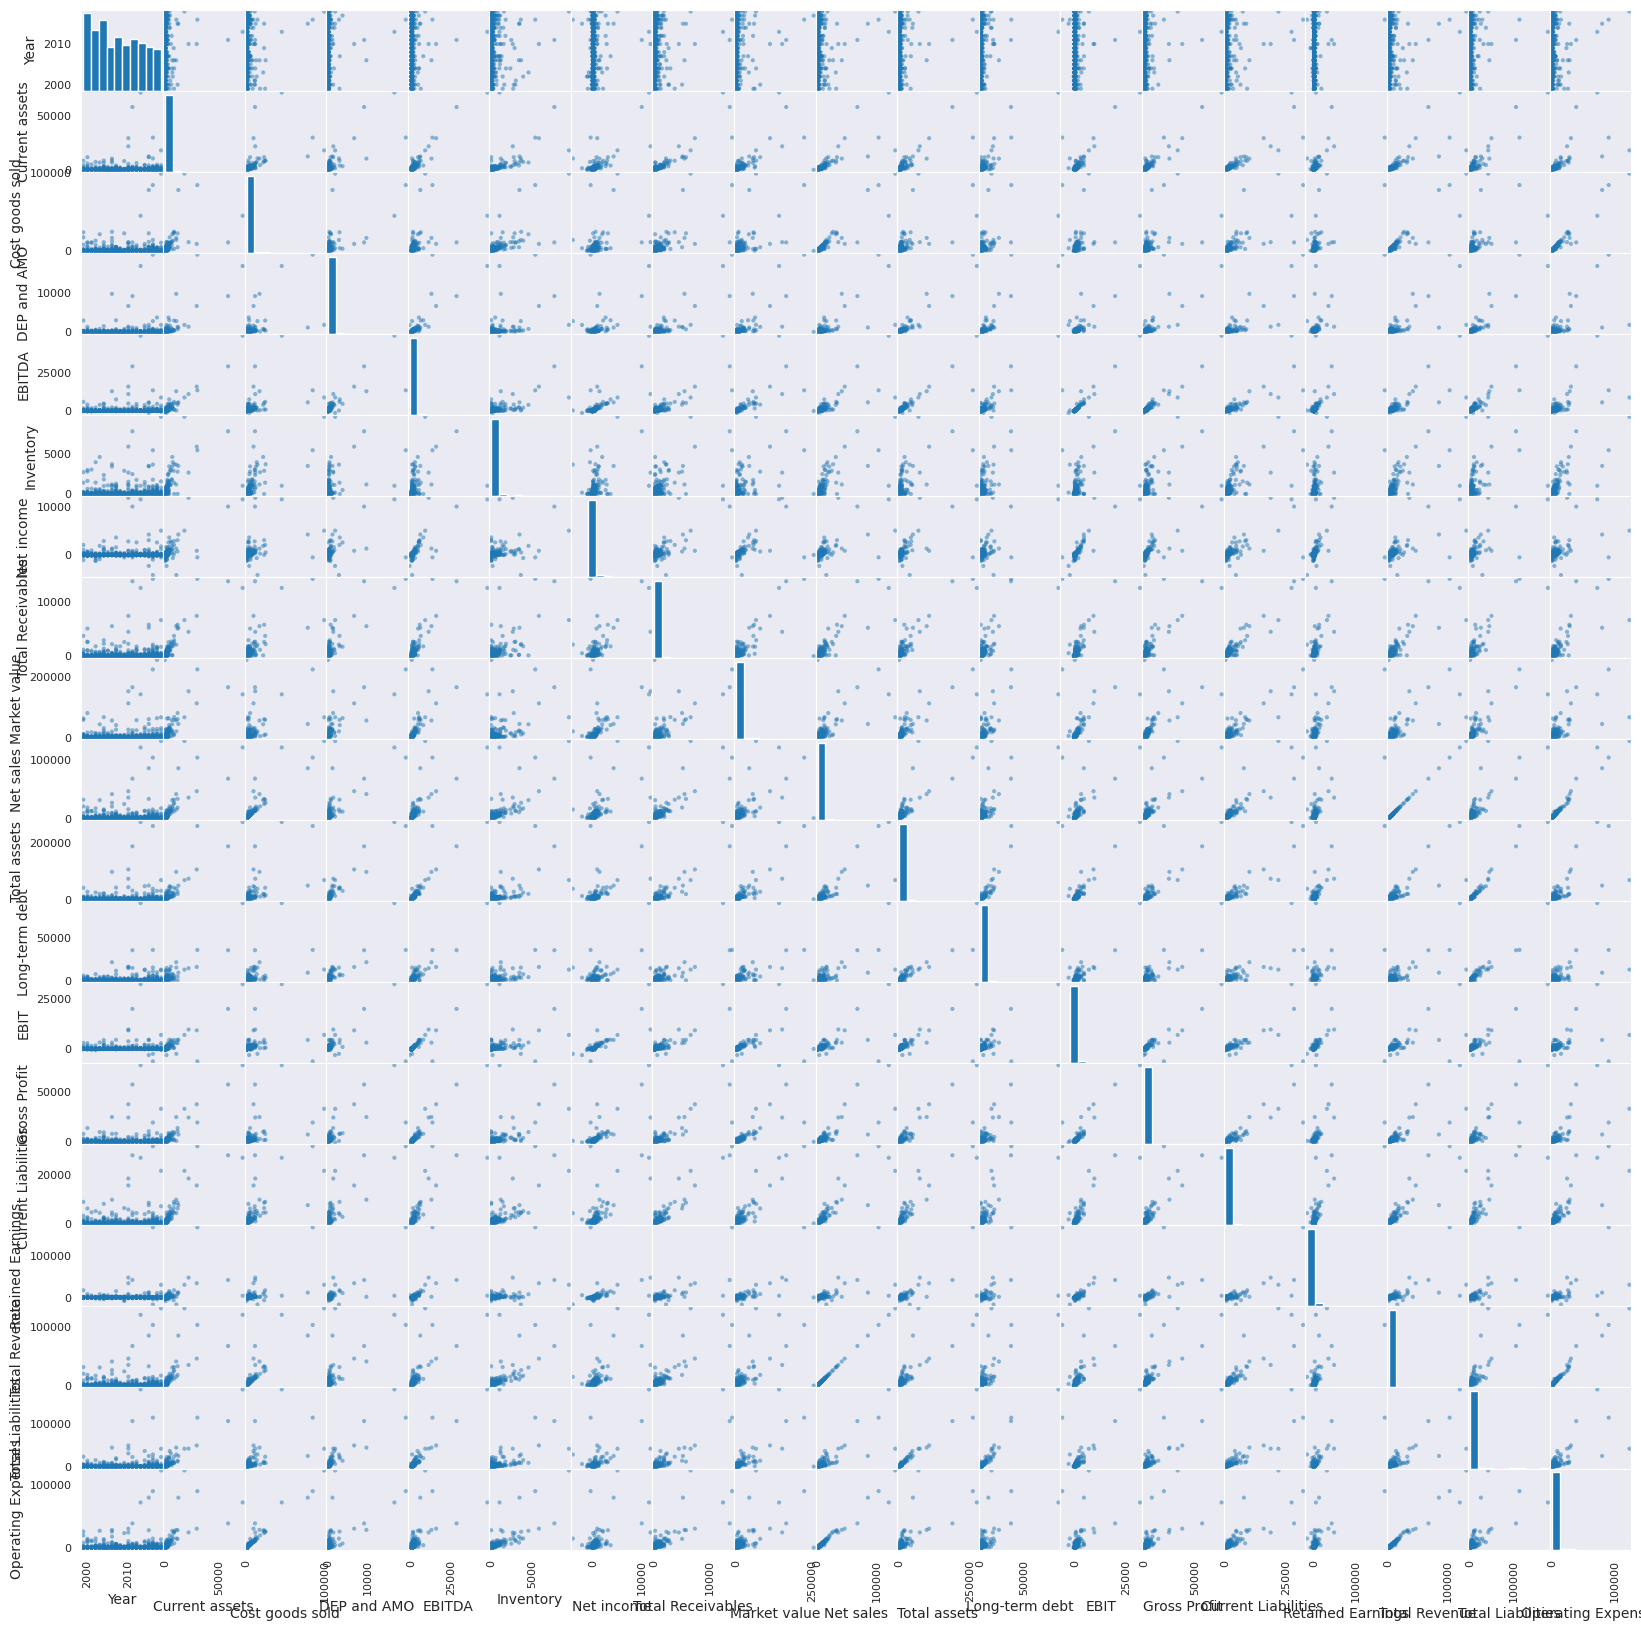

In [62]:
pd.plotting.scatter_matrix(df, figsize=(20,20))

### Correlation matrix

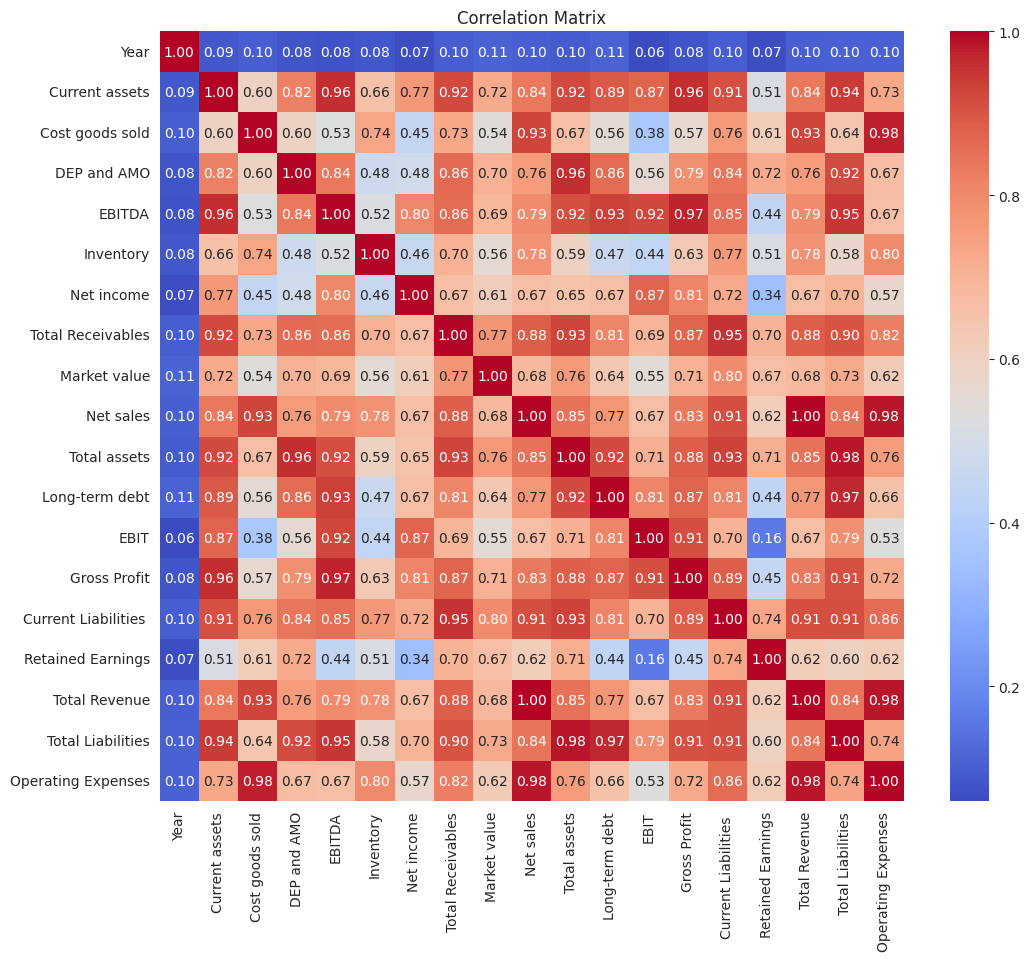

In [63]:
non_numeric_columns = df.select_dtypes(exclude='number').columns
df_numeric_columns = df.drop(columns=non_numeric_columns)
correlation_matrix = df_numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()